## EXPLORATORY DATA ANALYSIS ON RETAIL SALES DATA

In [206]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,Markdown
%matplotlib inline

In [207]:
#Setting the visulaizing style
sns.set_style('whitegrid')

## Step 1 : Loading the dataset

In [208]:
df=pd.read_csv('Retail_Sales_Dataset.csv')
display(Markdown(" # Displaing First Few Rows Of Dataset"))
df.head()

 # Displaing First Few Rows Of Dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [209]:
display(Markdown("# Some Information About Dataset"))
df.info()

# Some Information About Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Step 2 : Data Cleaning

Task 1: Checking For Null / Missing Values

In [210]:
# display the column which have null values
null_columns=[features for features in df.columns if df[features].isna().sum()>0]
null_columns

[]

Observation -> Empty list (null_columns) shows there are no null values present

# Task 2: Checking For Duplicates Values

In [211]:
duplicates=df.duplicated().sum()
print(f"No . of Duplicates Rows : {duplicates}")

No . of Duplicates Rows : 0


# As there are no duplicates present in our dataset

## Step 3 : Descriptive Statistics

In [212]:
#Calculating some basic statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [213]:
#Descriptive Statistics for categoriacl column
for column in df.select_dtypes(include='object').columns:
    print(f"\n Value counts for {column}",df[column].value_counts())


 Value counts for Date Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-02-05     8
2023-08-05     8
              ..
2023-03-02     1
2023-08-02     1
2023-04-17     1
2023-03-30     1
2023-05-28     1
Name: count, Length: 345, dtype: int64

 Value counts for Customer ID Customer ID
CUST1000    1
CUST001     1
CUST002     1
CUST003     1
CUST004     1
           ..
CUST013     1
CUST012     1
CUST011     1
CUST010     1
CUST009     1
Name: count, Length: 1000, dtype: int64

 Value counts for Gender Gender
Female    510
Male      490
Name: count, dtype: int64

 Value counts for Product Category Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


## Step 5: Displaying Most Common Category In Ecah Column 

In [214]:
df.mode().iloc[0]
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

## Step 4: Performing time series analysis (IF Applicable)

In [215]:
df['Date']=pd.to_datetime(df['Date'])
print(df.Date)

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]


# Monthly Sales Trend

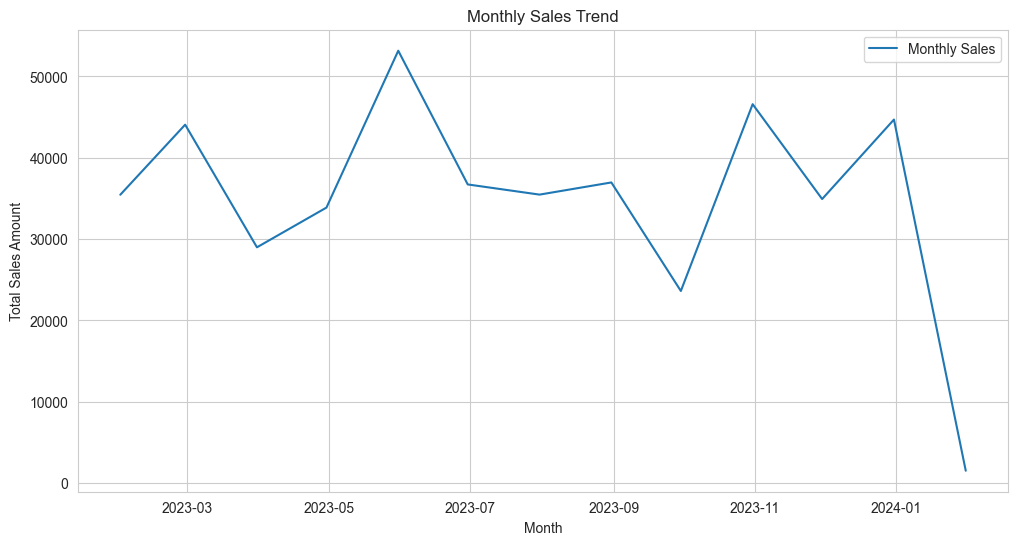

In [216]:

# Monthly Sales Trend Analysis
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('ME').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.show()

In [217]:
# Customer and Product Analysis
# Top 10 customers by total purchase amount
top_customers = df.groupby('Customer ID')['Total Amount'].sum().nlargest(10)
print("\nTop 10 Customers by Total Amount:\n", top_customers)


Top 10 Customers by Total Amount:
 Customer ID
CUST015    2000
CUST065    2000
CUST072    2000
CUST074    2000
CUST089    2000
CUST093    2000
CUST109    2000
CUST118    2000
CUST124    2000
CUST139    2000
Name: Total Amount, dtype: int64


In [218]:

# Top product categories by quantity sold
top_categories = df.groupby('Product Category')['Quantity'].sum().nlargest(10)
print("\nTop Product Categories by Quantity:\n", top_categories)


Top Product Categories by Quantity:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


# Top Product Categories by Quantity Sold

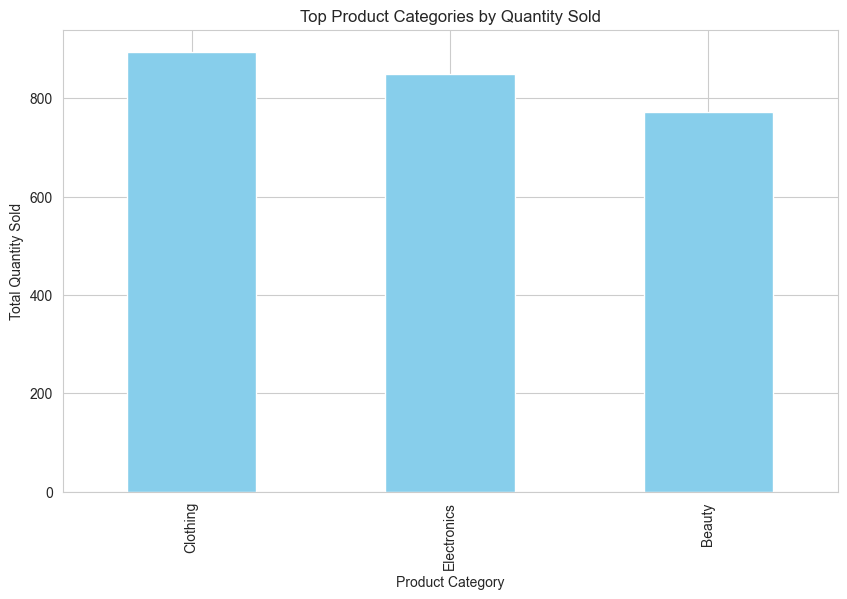

In [219]:
# Visualizing top product categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Quantity Sold')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()


# Age Distribution of Customers

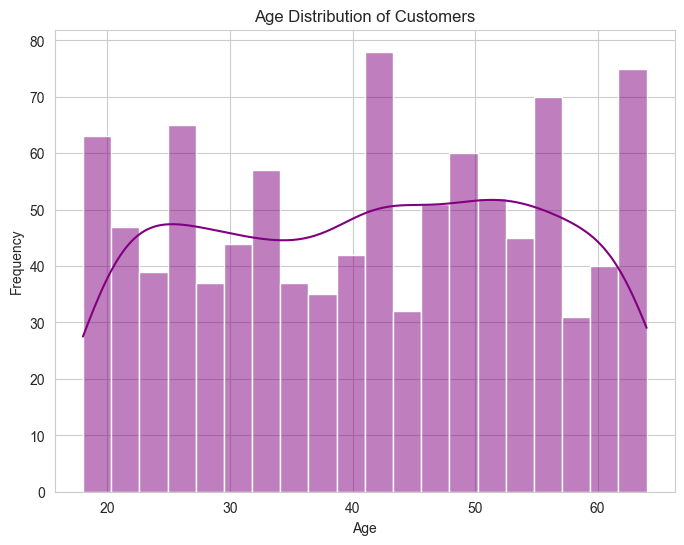

In [220]:
# Analyzing Age and Gender Distribution of Customers
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution of Customers 

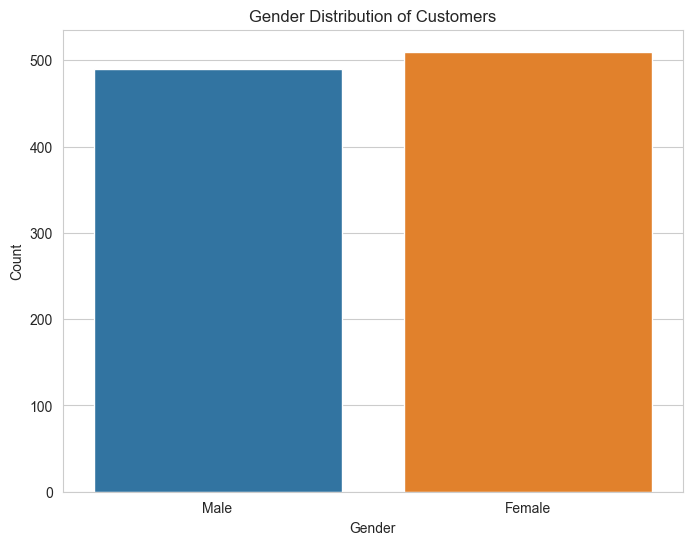

In [221]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df,hue='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of Sales Amount

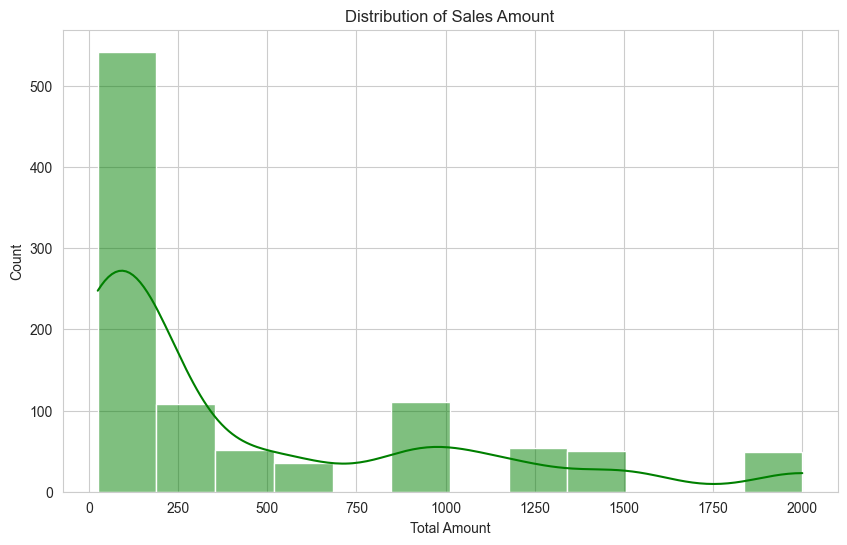

In [222]:
# Sales distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], kde=True, color='green')
plt.title('Distribution of Sales Amount')
plt.xlabel('Total Amount')
plt.show()

# Co-Relation HeatMap

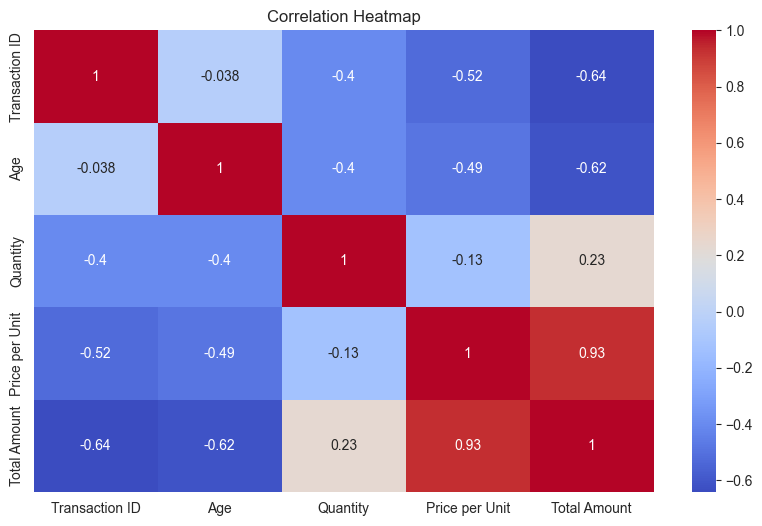

In [223]:
# Heatmap of correlations (for numerical columns)
plt.figure(figsize=(10, 6))
num_df=df.corr(numeric_only=True)
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Sales By Category

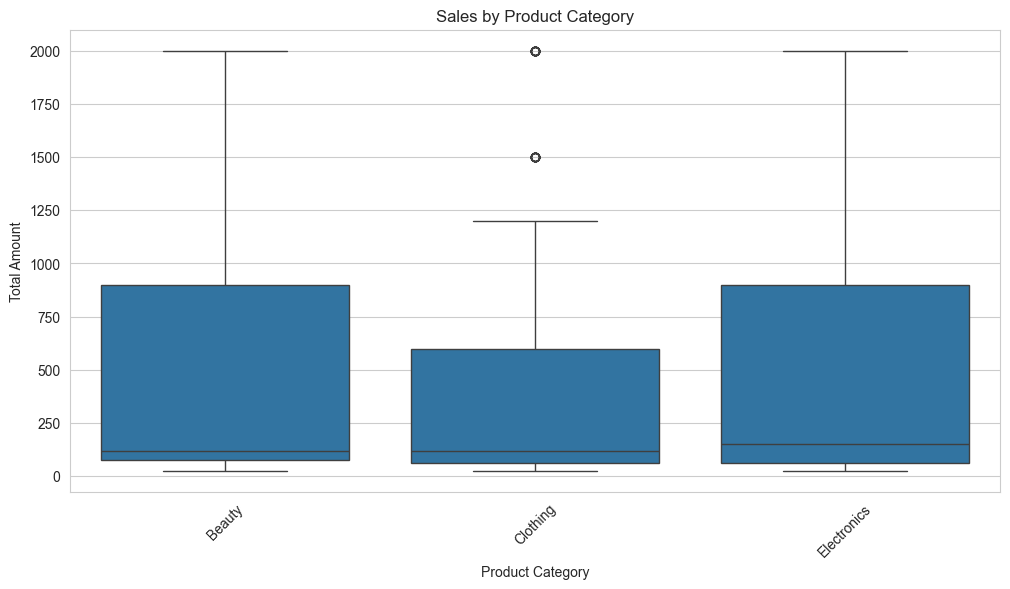

In [224]:
# Box plot to show sales by product categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Total Amount', data=df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# Recommendations

In [225]:
# Recommendations - Summarize insights
print("\nRecommendations based on the EDA:")
print("1. Consider seasonal trends for inventory adjustments.")
print("2. Focus marketing on top product categories.")
print("3. Implement targeted campaigns for high-value customer segments.")


Recommendations based on the EDA:
1. Consider seasonal trends for inventory adjustments.
2. Focus marketing on top product categories.
3. Implement targeted campaigns for high-value customer segments.


## ----------------------------------------------------
# Exploratory Data Analysis is Completed
## ----------------------------------------------------